# MLR - Bike Sharing Assignment

The code is divided into two main parts:
Part 1: Data understanding, Data cleaning, EDA and Data Preperation
Part 2: Model building and Model evaluation	

In [187]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [163]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Data understanding, Data cleaning, EDA and Data Preperation

## STEP 1: Reading & Understanding Data

In [164]:
# Importing data using the pandas library
bike = pd.read_csv("day.csv", sep=",")
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data Understanding
Let us start with understanding the structure of the data : it's shape, size, information, description, columns etc.

In [165]:
bike.shape

(730, 16)

In [166]:
bike.size

11680

In [167]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [168]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [169]:
# let's look at the first few rows of the df
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [170]:
# Looking at all the column names
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

At the first look, we can say some of the important columns in the dataset are holiday, weekday, workingday, season, weathersit etc.

The **target variable**, which we want to compare across the independent variables, is **cnt**. 
The goal is to figure out:
1. Which independent variables are significant in predicting the demand for shared bikes
2. How well those variables describe the bike demands



## STEP 2: Data Cleaning

### Missing Values
Let us check if any columns have a large number of missing values, if they do have it, let's first fix the missing values and then check for other types of data quality problems.

In [172]:
# summarising number of missing values in each column
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data looks good as far as missing values in columns are concerned, no actions needed

Now let's check whether any rows have a large number of missing values

In [173]:
# missing values in rows
bike.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

This too looks good, no actions needed.
The data looks clean by and large. Let's also check whether all columns are in the correct format.

In [174]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

OSERVATIONS:
1. Except one column i.e. dteday which is object type, all other are either float or integer type.
2. This column **dteday** gives information about date, month and year. However, we already have a column **yr** which is telling us if its 2018 or 2019. Also, column **mnth**, is telling us which month it is. and a column which **weekday** or if it was a **holiday**

ACTIONS NEEDED:
1. So we can either ignore **dteday** column completely or at max extract date in case we decide it is important

In [175]:
bike.nunique() # checking unique values

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

 There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc. We will have to analyze and decide whether to convert them to categorical or treat as integer.


### Duplicate checking

In [176]:
bike_dup = bike.copy() # Created a copy of original dataframe for duplicate check

bike_dup.drop_duplicates(subset=None, inplace=True) # Checking for duplicates and dropping the entire duplicate row if any

bike_dup.shape

(730, 16)

OSERVATIONS:
1. The shape after running the drop duplicate command is same as the original dataframe.

Whic means there are zero duplicates in the dataset

NO ACTION NEEDED


### Identify and remove redundant column/s & column/s with no useful information
This is as such part of Data Preperation, but we will execute it at thie stage so that while doing exporatory data analysis and data visualization, we don't have to look at these data as well

In [177]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

After a close look at the data and the data dictionary, it is clear that the following variables can be removed from further analysis:

1. instant : as its only an index value, not giving any useful information

2. dteday : A lot of redundant data here. Since we already have seperate columns for 'year' & 'month', the only new information here is date. The date can also be explained by year, mnth, weekday columns so we can drop it and moveover it's not a time series data so date is not important. 

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. However, we shall create a new variable for the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation.


In [178]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [179]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## STEP 2: Exploratory Data Analysis  

### EDA Based on Visualising the Data
\
Let's now spend some more time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where we'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

#### Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to Sales.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables


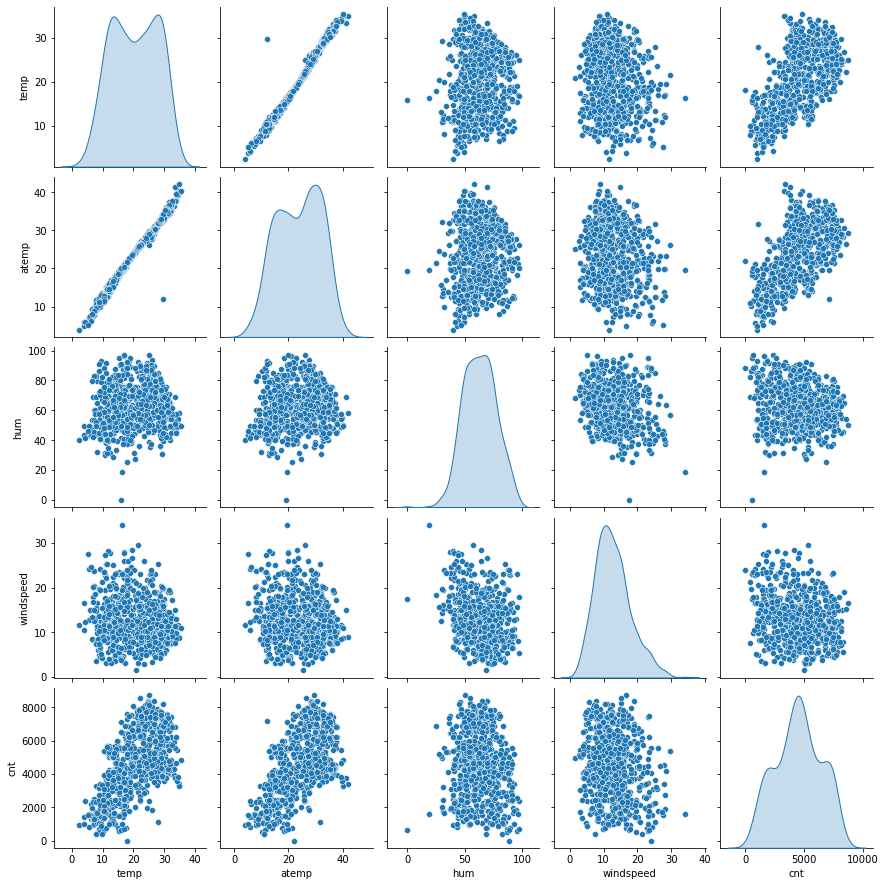

In [180]:
# Create a new dataframe of only numeric variables:

bike_num = bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

#### OBSERVATIONS:
1. The above Pair-Plot clearly shows that there is a strong Linear Relation between 'temp' &'atemp'
2. it also shows linear relation between 'temp' and 'cnt' as well as between 'atemp' and 'cnt 

#### ACTION NEEDED:
1. Ma be we can drop 'atemp' as it is highly correlated wit 'temp' and ence redundant. Let us take that call after checking model parameters for 'atemp'


### Visualising Categorical Variables

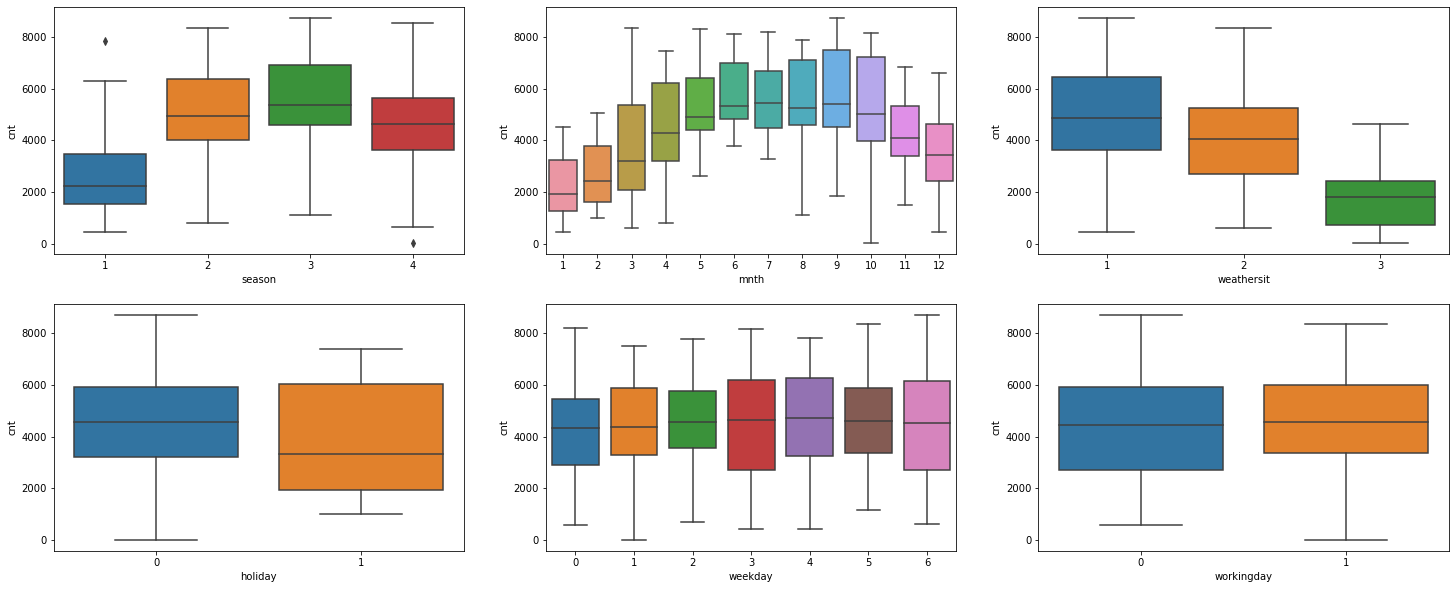

In [181]:
# Build boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()


#### OBSERVATIONS:

There are 6 categorical variables in the dataset, namely - season ('season'), month ('mnth'), weather situation ('weathersit'), holiday ('holiday'), weekday ('weekday') and working day ('workingday').

Let us use Box plot (refer the fig above) to study their effect on the target variable count (‘cnt’) .

The inference derived:

1. season v/s cnt: Bike Demand is high in Summer and Fall and it decreases in Winter. Highest bike booking are happening in fall (season3) with a median of over 5000 booking. This is followed by summer (season2) & winter (season4). This indicates, season can be a good predictor for the dependent variable. Demand for bike in spring is less, which is a little surprising, as it should be actually high during that time as weather is favourable. To understand the reason behind this we have also plotted “Seasons V/s cnt w.r.t Year” later in the code and we did get some answers.

2. mnth v/s cnt: High amount of the bike bookings are happening in the months 5,6,7,8, 9 and 10 (May to Oct) with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

3. weathersit v/s cnt: To start with, we only see 3 categorical variables (clear, mist and light snow). Fourth weather situation, namely heavy rain-snow-fog is completely missing in the plot. Secondly, the median cnt is decreasing from clear to misty to light snow situation, i.e. clear > misty > light snow. Highest bike bookings are happening during ‘weathersit 1 (clear) with a median of close to 5000 booking. This also makes sense logicall as weathersit 1 is - Clear, Few clouds, Partly cloudy. This is followed by weathersit 2 and then weathersit 3. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

4. holiday: Median as well as maximum value of count is higher when it is not a holiday. We need to look at what weekday plot is showing as oliday and workingday will be eventually giving the similar information.

5. weekday: On first look, Median is almost similar for all week days (little above 4000). Which means bike demand on all days are more or less similar. Hence, this variable can have some or no influence towards the predictor. Hence I will let the model decide if this needs to be added or not.

6. workingday: Median of bike demand cnt is more or less similar for working (1) and not-a-working-day (0), a little above 4000. This indicates, workingday may or may not be a good predictor for the dependent variable. And so we let the model decide if this needs to be added or not.

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

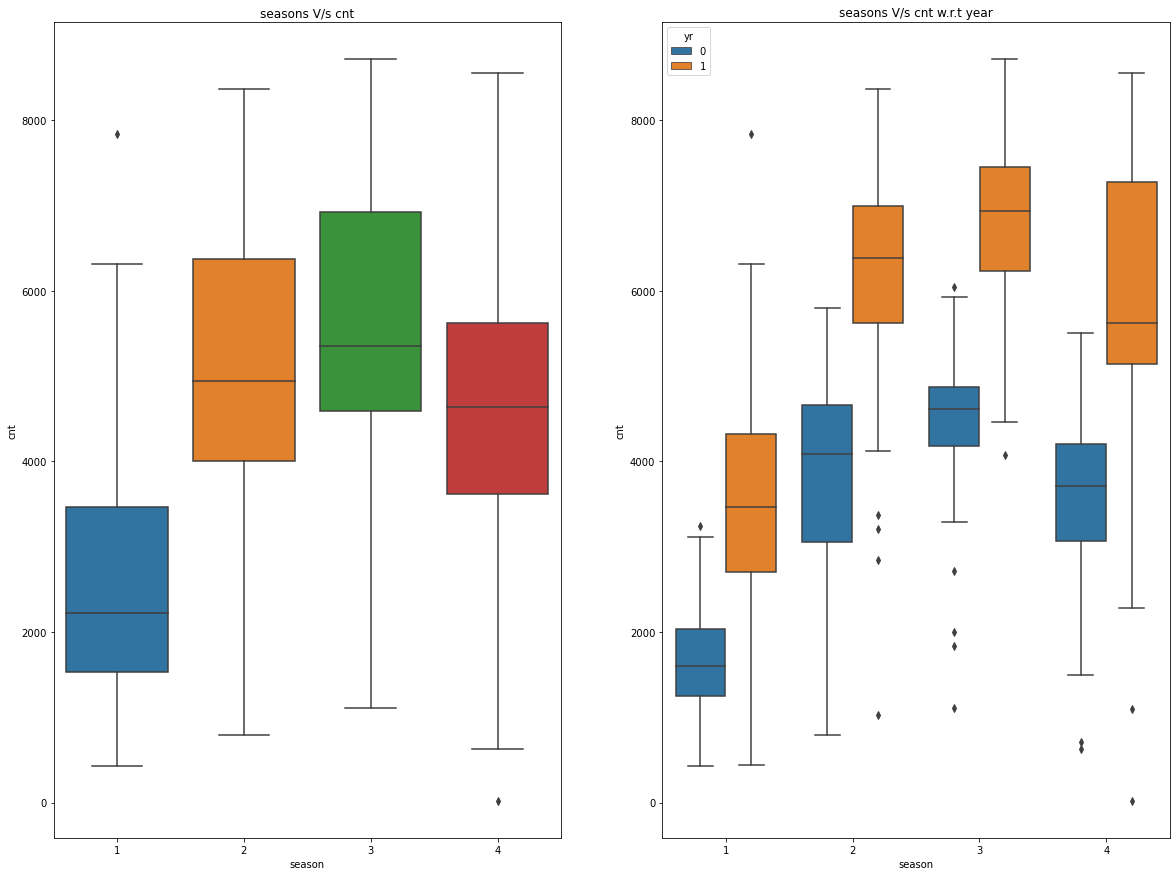

In [182]:
# Visualization of Categorical data using boxplot for seasons V/s cnt and seasons V/s cnt w.r.t yr

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.title('seasons V/s cnt')

plt.subplot(1,2,2)
sns.boxplot(x='season', y='cnt', hue='yr', data=bike)
plt.title('seasons V/s cnt w.r.t year')
plt.show()


#### Observations

#### seasons V/s cnt 
1. bike demand is high in summer (season 2) and fall (season 3) and it reduces in winter (season 4)
2. however, demand for bike in spring (season 1) is less which doesn't logically make sense as it should be high due to favourable weather conditions. We need to dig deeper to understand what might be causing this.

To understand spring demand behaviour we plot seasons V/s cnt w.r.t year as below.
#### seasons V/s cnt w.r.t year  
1. In 2018-Spring, when the bike sharing venture was launched, it was still a new concept and may be that is why demand was less. But gradually the demand increased from 2018-summer onwards and now if you look at spring 2019, overall demand and median has gone higher compared to 2018-spring. So it may not be the case that demand is less in spring season as it looked like at first.

#### Insights derived from observations 
1. This boxplot also shows how the cnt got increased from the 2018 to 2019. That indicates that the whole concept was received well and was gaining popularity with time. 
2. But unfortunately after that Covid period started, which obviously was not a usual circumstances.
3. now, once covid period is over and situation is getting back to normal, thanks to already registered customers, the initial demand pattern may follow and demand will increase with time once again
3. Like in 2018 and 2019, in coming year first quarter may see less demand but demand will definitely increase  

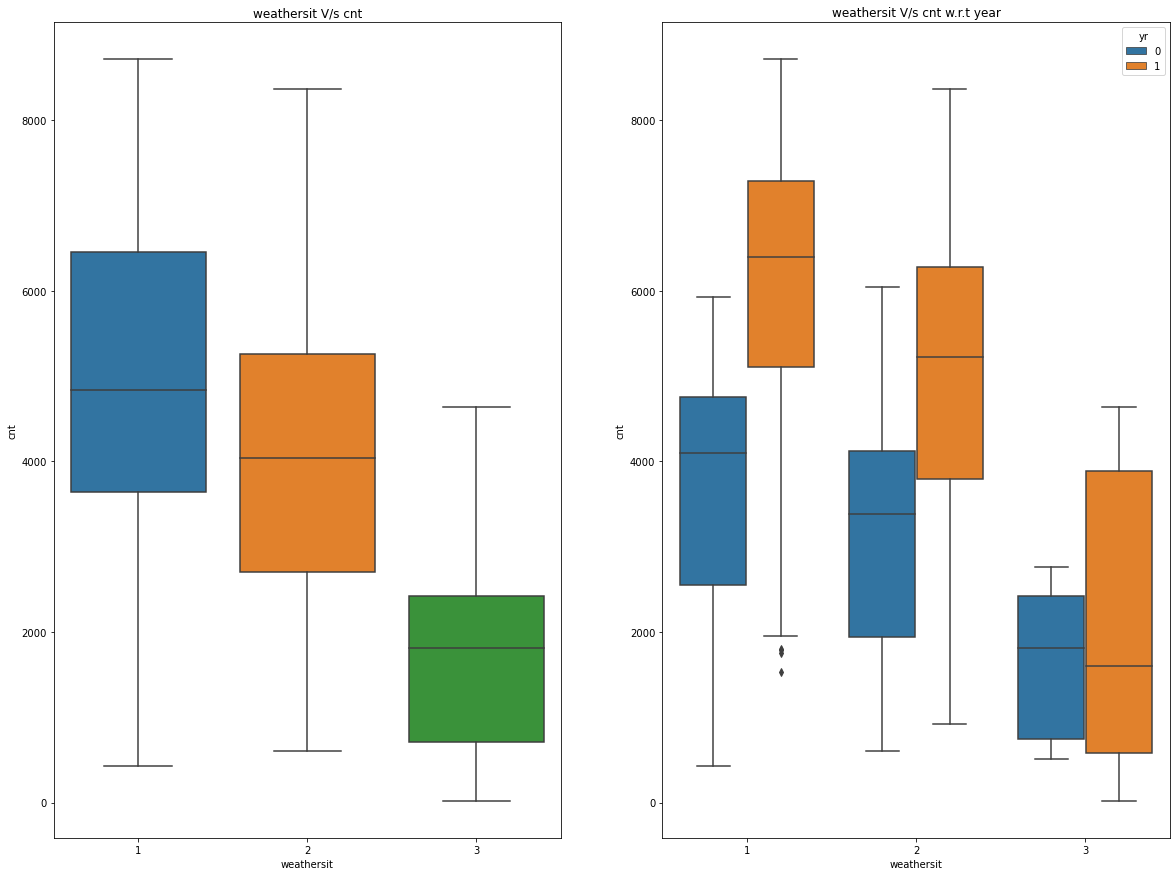

In [183]:
# Visualization of Categorical data using boxplot for weathersit V/s cnt and weathersit V/s cnt w.r.t yr

plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.title('weathersit V/s cnt')

plt.subplot(1,2,2)
sns.boxplot(x='weathersit', y='cnt', hue='yr', data=bike)
plt.title('weathersit V/s cnt w.r.t year')
plt.show()


#### Observations

#### weathersit V/s cnt 
1. bike demand is high in clear situation than when its misty or light snow
2. zero demand in case of heavy rains or snow or fog

To understand demand behaviour over two years, we plot weathersit V/s cnt w.r.t year as below
#### weathersit V/s cnt w.r.t year  
1. Once again we see the same trend, in 2018 the cnt (casual + registered) was less and it gradually increased in 2019

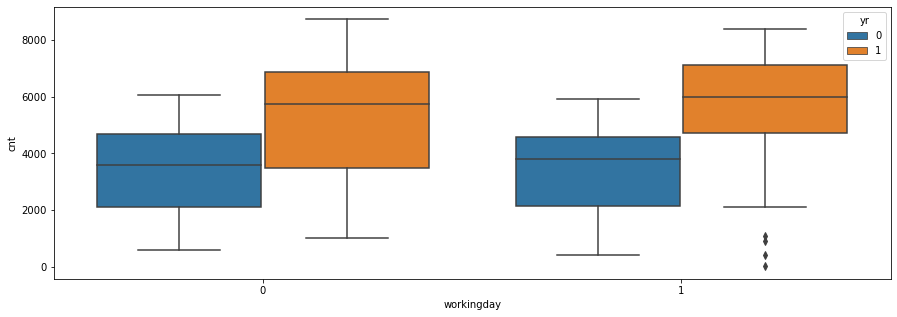

In [184]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'yr', data = bike_new)
plt.show()

#### Observations

To understand demand behaviour over two years, we plot workingday V/s cnt w.r.t year as below

#### workingday V/s cnt w.r.t year  
1. Once again we see the same trend, in 2018 the cnt (due casual + registered) was less and it gradually increased in 2019


### EDA based on Correlations

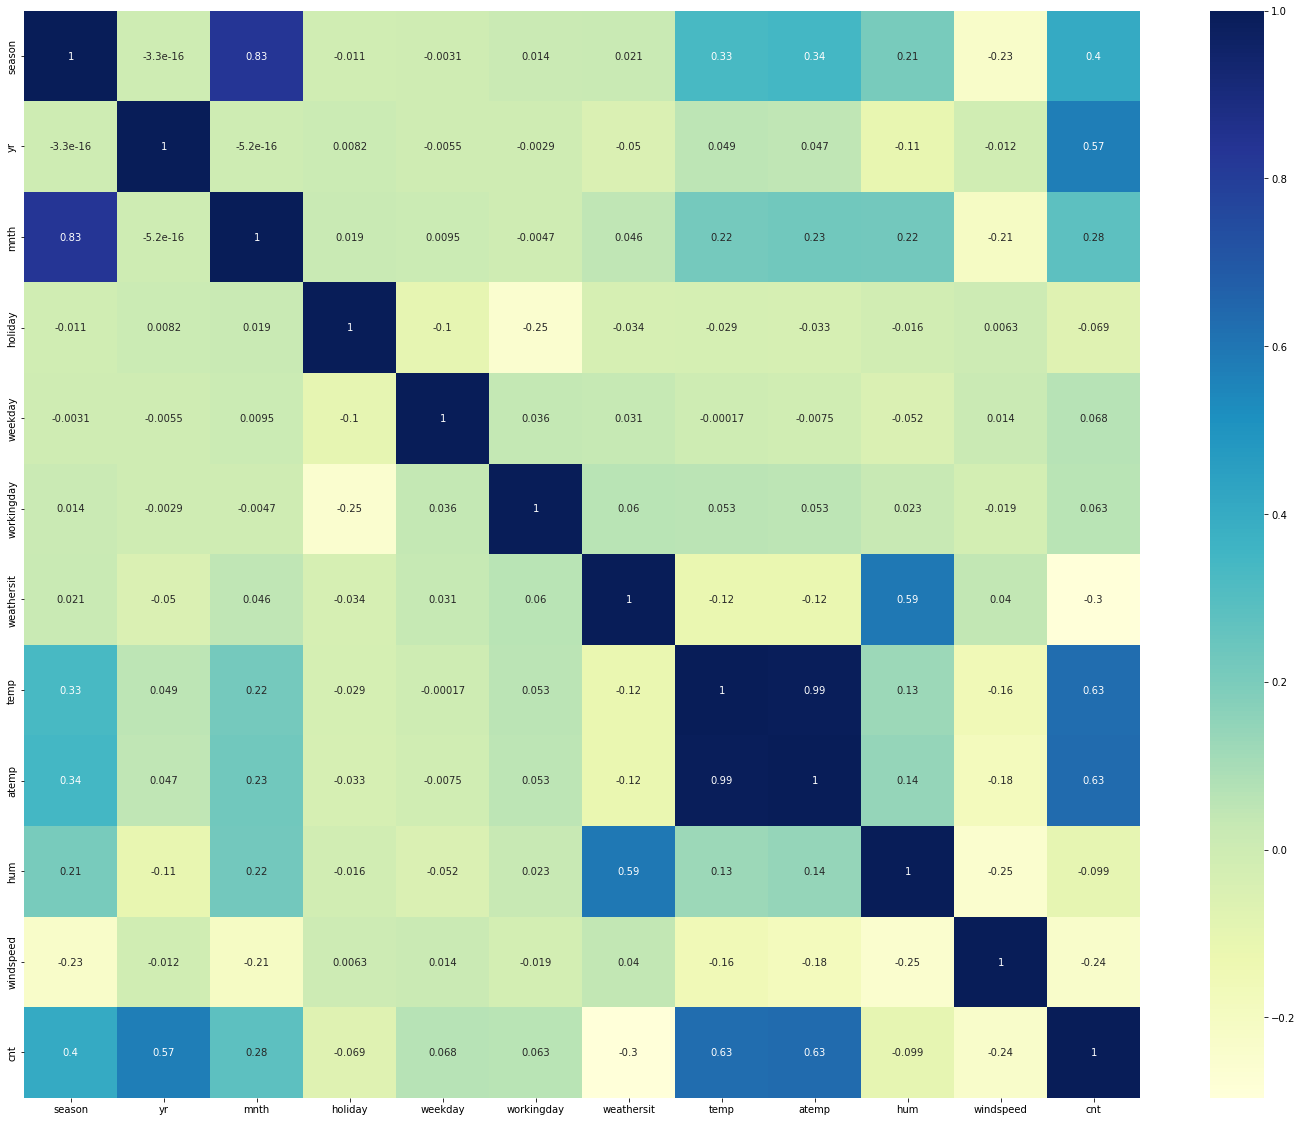

In [185]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### OSERVATIONS:
1. The heatmap clearly shows which all variables are multicollinear in nature, and which variables have high collinearity with our target variable 'cnt'

2. Target variable count has good correlation with 'temp' and 'atemp' (0.63) as observed earlier in the pair plots. What is noticeable is temp and atemp is highly correlated wit correlation value 0.99 - indicating we can drop one of them. But le us do that after observing wat model tells us.

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.



## STEP 3: Data Preperations

### Create Dummy Variables

Encoding: 
- Converting binary vars to 1/0:
    We do not have any binary variables, so this is not needed
- other catagorical vars to dummy vars:
    We will create dummy variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

But before creating dummy variables, we need to convert them into 'category' data types.

In [188]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [189]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [190]:
bike_new = pd.get_dummies(bike_new, drop_first=True)

# pd.get_dummies is used for data manipulation. It mainly performs 3 tasks:
# 1) It converts categorical data into dummy or indicator variables
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created

bike_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [191]:
bike_new.shape

(730, 30)

In [192]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets

This is the first basic step for regression is performing a train-test split.

We will now split the data into tarining data set and testing data set (70:30 ratio) using train_test_split method from sklearn package.

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [195]:
print(df_train.shape, df_test.shape)

(510, 30) (219, 30)


The size of both the data set confirms 70:30 split

#### RESCALING THE FEATURES
Let us rescale the indepndent variables using Min-Max method (normalization)

In [196]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [198]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [199]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# create a list of numeric (non-binary)variables 

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [200]:
# Apply scaler() to all the numeric variables
# fit() : learns xmin, xmax
# transform() : computes x - xmin / (xmax - xmin) 
# fit_transform() : learns xmin, xmax and computes x - xmin / (xmax - xmin) 

df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # Fit on data

In [201]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 5: Building a linear model

#### Dividing into X and Y sets for the model building

In [203]:
y_train = df_train.pop('cnt') # dependent variable columns
X_train = df_train # independent variables columns

In [204]:
y_train.head()

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
Name: cnt, dtype: float64

In [205]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Approach 1: Using RFE + Mannual dropping of insignificant variable/s
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [206]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Let's find out the N features which are best fit using RFE method.

Tried with N = 20, 15, 12, 10

Best possible combination of predictor variables will be the criteria of p-value < 0.05 and VIF < 5 

When we started with with N = 15 and dropped till N = 10, it met with the above criteria and it also retained the variables that logically made more sense. 

So presenting here only results with N = 15

In [207]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [208]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [209]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [210]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
483,1,0,0.497426,0.487055,0.609956,0.194850,1,0,0,0,0,0,0,0,0
650,1,0,0.416433,0.409971,0.513852,0.255118,0,0,1,0,0,1,1,0,0
212,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,0,0,0,0,0,0
714,1,0,0.378013,0.381804,0.871429,0.161523,0,0,1,0,0,0,0,1,0
8,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,0.477697,0.463017,0.424242,0.274350,1,0,0,0,0,0,0,0,0
444,1,1,0.588804,0.569931,0.853247,0.138467,1,0,0,1,0,0,0,1,0
46,0,1,0.322889,0.311266,0.439977,0.472919,0,0,0,0,0,0,0,0,0
374,1,1,0.310971,0.314713,0.671711,0.340487,0,0,0,0,0,0,0,0,0


### Building Linear Model using 'STATS MODEL' and variables identification based on  RFE 
#### Model 1
#### VIF Check


In [211]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [212]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [213]:
# Check the parameters obtained

lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [214]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.28e-186
Time:                        23:31:49   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

#### Need to decide which vars to drop

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value; which in the above case looks like 'atemp' with p-value of 0.670. 
A better way would be to supplement this with the VIF information.

So lets check
* Significance based on p-value (higher the p-value, less significant)
* redundancy based on VIF  (higher VIF, high correlation with other Vaars and so redundant)


### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

VIFi = 1 / (1 -R^2 )

We generally want a VIF that is less than 5. 

Why VIF = 5 is considered huge?
VIF = 5 = 1/ (1-R^2)

1-R^2 = 0.2

R^2 = 0.8 which is huge as 80% of variance in bedrooms is covered by other vars

#### Model 2
Removing the variable 'atemp' based on its High p-value (0.67) & High VIF (363.12) - a definite drop candidate

In [215]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

#### VIF Check


In [216]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [217]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [218]:
# Check the parameters obtained

lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [219]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.00e-187
Time:                        23:34:57   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

#### Model 3
Removing the variable 'hum' based on its Very High 'VIF' value (17.23)

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on domain knowledge that temperature can be an important factor for a business like bike rentals, and hence wanted to retain 'temp'.

In [220]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### VIF Check

In [221]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [222]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [223]:
lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [224]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.52e-184
Time:                        23:36:28   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

#### Model 4
Removing the variable 'season3' based on its Very High 'VIF' value.

Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp' as mentioned earlier.

In [225]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

#### VIF CHheck

In [226]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [227]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [228]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.56e-181
Time:                        23:37:18   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

#### Model 5
Removing the variable 'mnth_10' based on its Very High p-value and relatively high VIF value

In [229]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

#### VIF Check

In [230]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [231]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [232]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.39e-181
Time:                        23:37:52   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

#### Model 6
Removing the mnth_3 due its high p value

In [233]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

#### VIF Check

In [234]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [235]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained

lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [236]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          3.77e-181
Time:                        23:38:39   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

We can probably stop at this point due to following reasons:  
1. all p-values are zero and all VIF values are under 5
2. Number of variables have reduced to 10 which is much better to handle compared to initial 30 (including dummy vars)
3. R-squared and Adj R-squared values are high (0.824 and 0.821 resp)
4. A high F-statistic value of 233.8

### 10 Variables that impacts the prediction 
yr, windspeed, temp, windspeed, season_2 (summer), season_4 (winter), mnth_9, weekday_6, weathersit_2 and weathersit_3

# Final Model Interpretation

## Hypothesis Testing
Hypothesis testing states that:

H0: B1=B2=...=Bn=0

H1: at least one Bi!=0

Model 6 parameter values are:
* const           0.084143
* yr              0.230846
* workingday      0.043203
* temp            0.563615
* windspeed      -0.155191
* season_2        0.082706
* season_4        0.128744
* mnth_9          0.094743
* weekday_6       0.056909
* weathersit_2   -0.074807
* weathersit_3   -0.306992

### From the above observations, it is evident that all our coefficients are not equal to zero and 
### hence we *REJECT the NULL HYPOTHESIS*

## F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 233.8

Prob (F-statistic): 3.77e-181

The F-Statistics value of 233 (which is muc greater than 1) and all the p-value of zero, states that the overall model is significant

### How well the selected independent variables describe the bike demands ?
### The equation of best fitted surface based on model lr6
cnt = 0.084143 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

### Which variables are significant in predicting the demand for shared bikes ? 
Based on Model analysis, below variables are significant: yr, workingday, temp, windspeed, season2, season4, mnth9, weekday6, weathersit2 and weathersit3. 

Some variables impact in positive way while others have negative impact. 

### Interpretation of Coefficients (in decreasing order of significance):

1. temp: A coefficient value of ‘0.5636’ indicates that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units (almost 56% hike in count whhich makes sense loggically too)

2. yr: A coefficient value of ‘0.2308’ indicates that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units (which is almost 23% hike in count). This indicates that with time, popularity of bike is increasing which in turn increases the count

3. weathersit_3: A coefficient value of ‘-0.307’ indicates that, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units (30% reduction in count)

4. season_4: A coefficient value of ‘0.128744’ indicates that a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units (12% rise in count)

5. windspeed: A coefficient value of ‘-0.155191’ indicates that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units (~15% reduction in count whhich makes sense loggically too)

6. workingday: A coefficient value of ‘0.043203’ indicates that a unit increase in workingday variable increases the bike hire numbers by 0.043203 units (a hike of ~4%)

7. season_2: A coefficient value of ‘0.082706’ indicates that a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units (a rise of ~ 8%)

8. mnth_9: A coefficient value of ‘0.094743’ indicates that a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units (a rise of ~9.4%)

9. weekday_6: A coefficient value of ‘0.056909’ indicates that a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units (a rise of ~5.6%)

10. weathersit_2: A coefficient value of ‘-0.074807’ indicates that a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units (~7.4% reduction in count)

11. const: The Constant value of ‘0.084143’ indicates that in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units (~8.4% rise in count)

# Assumptions
1. Normality: The residuals of the model (error terms) are normally distributed with mean zero (not X, Y)
2. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y
3. Multicollinearity: There is No Multicollinearity between the predictor variables i.e. predictor variables are not correlated to each other
4. Independent Error terms: Error terms are independent of each other
5. Homoscedasticity: Error terms have constant variance

## Residual Analysis Of Training Data

Text(0.5, 0, 'Errors')

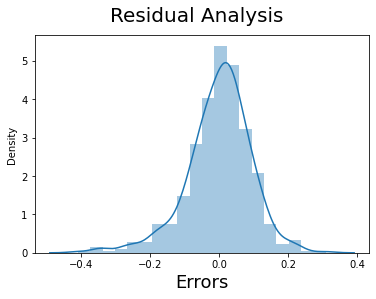

In [237]:
y_train_pred = lr6.predict(X_train_lm6)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

From the above histogram, we could see that the Residuals are normally distributed. Hence our first assumption for Linear Regression is valid.

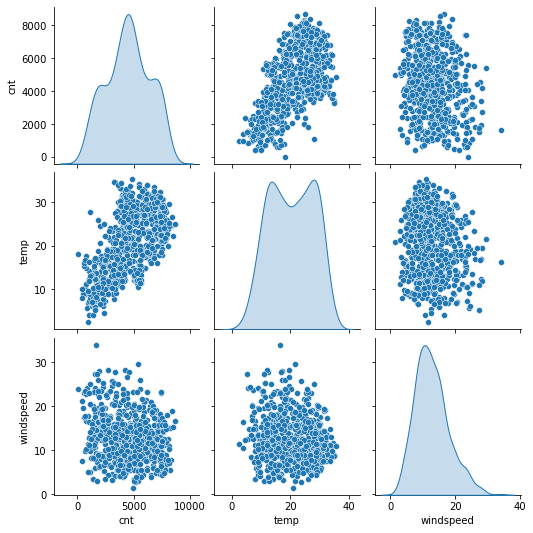

In [238]:
bike_rel=bike_new[[ 'cnt', 'temp', 'windspeed']]  # cconsidering only numerical variables

sns.pairplot(bike_rel, diag_kind='kde')
plt.show()


Count and temperature is clearly linearly related. For rest of the variables, we can make a statement after applying prediction on test data. 

In [239]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


All VIF values are < 5, ensuring predictor variables are not correlated to each other.

Text(0, 0.5, 'Error Terms')

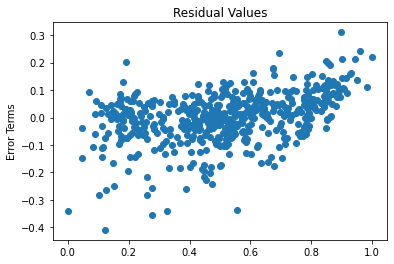

In [240]:
# Checking that error terms do not follow any pattern
plt.scatter(y_train,res)

plt.title('Residual Values')
#plt.xlabel('y_train')  
plt.ylabel('Error Terms')

#### Above scatter plot of residual values confirms that *error terms are indepndent and doesnt follow any pattern*.
#### The plot also confirms  Homoscedasticity. As can be seen the variance does not increase (or decrease) as the error values change. Also, the variance does not follow any pattern as the error terms change.


All VIF values are < 5 hence within the permissible range. Hence we can say that there doesn't exist any multicollinearity among predictor variables.

# Model Evaluation on training dataset

Text(0, 0.5, 'y_train_pred')

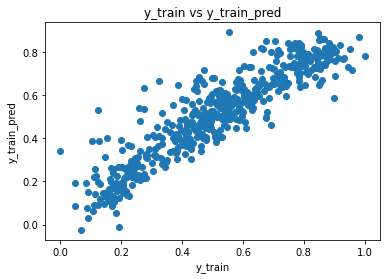

In [241]:
plt.scatter(y_train, y_train_pred)

plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred')

# Prediction using the Final Model and Test Data 
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

Applying the scaling on the test data set just like we did on the training set. 
We ddi not appl scaling on data before splitting it into train and test set, as if we do that then test data will have some information of train data in terms of minimum and maximum values. We would not want test data to know anything about test data and hence scaling of both data set has to be done individually.

In [242]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [243]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [244]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [245]:
#Selecting the variables that are used in the final model
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [246]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# Model Evaluation on test dataset

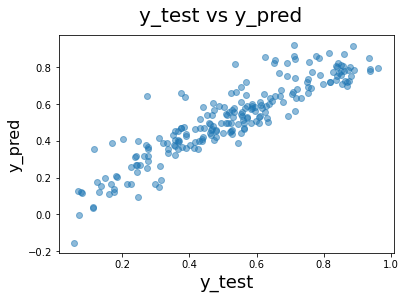

In [247]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

The above plot looks similar to y-pred v/s y_train plot

## R^2 value for TEST

In [248]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749706

R^2 value of test data is as good as train data which means we have an efficient model

## Model Summary w.r.t Bussiness Goals

After going through all analysis and evaluation, we can conclude the following:

#### Bike demand is impacted positively with below variables:

1. yr - As it is a new concept, after initial low demand, year on year there seems to be an increase in it's popularity and demand and hence we can fairly assume higher demands in coming year
2. temp - count increases with slight higher temperature. So may be the conceppt should be launched in cities which has acceptable temperature throughout the year or at least most art of te year 
3. Bike Demand is slightly higher in Month of September compared to other months. Also, overall demand is good from May to October. So in these months (or we can also say for summer and fall), may be more bikes can be offered during these period 
4. Similarly, demand is higher on working day compared to holidays

#### Bike Demand is impacted negatively with below variables:

1. Bike Demand is less during high wind speed
2. Bike Demand is less in Spring: This does not sound ok logically and we may be seeing suc trend due to not-so-good Dataset 
3. Bike Demand is less in Misty and Wet weather conditions basically about to rain or rainy sessions
 

# As such te assignment is finished at this point. However, just to test the second approach that we learned in te class, I am implementing that too for my own understanding

### Approach 2: Using Stats Model
### I am coding this part only for te sake of demonstration how this approach can be implemented and how we get a model which is similar to model we got from RFE in terms of performance

### Let us add all variables and analyse and decide which variable/s to remove


In [115]:
# Check all the columns of the dataframe

bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [116]:
#Build a linear model using StatsModel

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()  # model with all variables

lr_1.params

const           0.194683
yr              0.230001
holiday         0.002208
workingday      0.031904
temp            0.352402
atemp           0.103142
hum            -0.171527
windspeed      -0.180411
season_2        0.102085
season_3        0.090599
season_4        0.179040
mnth_2          0.015681
mnth_3          0.067213
mnth_4          0.037187
mnth_5          0.064938
mnth_6          0.042440
mnth_7          0.000700
mnth_8          0.029100
mnth_9          0.107261
mnth_10         0.045564
mnth_11        -0.021877
mnth_12        -0.012952
weekday_1      -0.016644
weekday_2       0.003178
weekday_3       0.016921
weekday_4       0.012838
weekday_5       0.017819
weekday_6       0.053802
weathersit_2   -0.049620
weathersit_3   -0.270104
dtype: float64

#### Observations:
1. Scanning throgh thhe coefficent values, one can notice that coeff for temp is the highest, 0.4, indicating count depends on temp the most as it describes 40% of the variance in count.
2. The next important variable lloks like weathersit_3 with negative dependancy that descibes 25% of variance in count

In [117]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.67e-176
Time:                        21:04:52   Log-Likelihood:                 517.04
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     481   BIC:                            -853.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1947      0.032      6.178   

#### Need to decide which vars to drop

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value; wich in te above case looks like 'atemp' with p-value of 0.714. 
A better way would be to supplement this with the VIF information.

So lets check
* Significance based on p-value (higher the p-value, less significant)
* redundancy based on VIF  (higher VIF, high correlation with other Vaars and so redundant)


### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

VIFi = 1 / (1 -Ri^2 )

We generally want a VIF that is less than 5. 

Why VIF = 5 is considered huge?
VIF = 5 = 1/ (1-r^2)
1-r^2 = 0.2
r^2 = 0.8 which is huge as 80% of variance in bedrooms is covered by other vars

In [118]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_4,inf
22,weekday_2,inf
2,workingday,inf
23,weekday_3,inf
1,holiday,inf
25,weekday_5,inf
21,weekday_1,inf
3,temp,434.95
4,atemp,378.25
5,hum,21.80


#### Dropping the variable and updating the model
#### We could have:
* High p-value, high VIF - definitely drop this var
* High-Low
    * High p-value, low VIF - can remove these kind of vars next and review new  VIFs
    * Low p-value, high VIF - remove these last after studying final p and VIF
* Low p , Low VIF - are significant variables

As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
One of these variables is, holiday as it has infinite VIF which indicates exact correlation with some other variabke, so a definite drop candidate. From the domain knowledge also we knoe that information given by 'holiday' is also available by 'workingday', and hence it is redundant whic is proven by infinite VIF value.

In [120]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('holiday', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\1035040371.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop('holiday', 1,)


In [121]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

const           0.194683
yr              0.230001
workingday      0.029696
temp            0.352402
atemp           0.103142
hum            -0.171527
windspeed      -0.180411
season_2        0.102085
season_3        0.090599
season_4        0.179040
mnth_2          0.015681
mnth_3          0.067213
mnth_4          0.037187
mnth_5          0.064938
mnth_6          0.042440
mnth_7          0.000700
mnth_8          0.029100
mnth_9          0.107261
mnth_10         0.045564
mnth_11        -0.021877
mnth_12        -0.012952
weekday_1      -0.014436
weekday_2       0.005386
weekday_3       0.019129
weekday_4       0.015046
weekday_5       0.020027
weekday_6       0.053802
weathersit_2   -0.049620
weathersit_3   -0.270104
dtype: float64

In [122]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          4.67e-176
Time:                        21:05:15   Log-Likelihood:                 517.04
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     481   BIC:                            -853.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1947      0.032      6.178   

In [123]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,434.95
3,atemp,378.25
1,workingday,33.34
4,hum,21.80
7,season_3,15.51
15,mnth_8,11.10
6,season_2,10.89
8,season_4,10.39
14,mnth_7,9.64
22,weekday_3,9.15


As you can see from the summary and the VIF dataframe, some variables are still insignificant. 
One of these variables is, atemp as it has a high p-value of 0.461 and also high VIF of 378, so a definite drop candidate.

In [124]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('atemp', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\2935491069.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('atemp', 1,)


In [125]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.params

const           0.195890
yr              0.229931
workingday      0.030801
temp            0.451782
hum            -0.170886
windspeed      -0.184784
season_2        0.102273
season_3        0.090103
season_4        0.179714
mnth_2          0.016248
mnth_3          0.067504
mnth_4          0.037864
mnth_5          0.064217
mnth_6          0.040991
mnth_7         -0.000741
mnth_8          0.026401
mnth_9          0.105873
mnth_10         0.045284
mnth_11        -0.021893
mnth_12        -0.012699
weekday_1      -0.015221
weekday_2       0.004289
weekday_3       0.017858
weekday_4       0.013957
weekday_5       0.018158
weekday_6       0.053817
weathersit_2   -0.049765
weathersit_3   -0.270868
dtype: float64

In [126]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.10e-177
Time:                        21:05:47   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     482   BIC:                            -858.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1959      0.031      6.227   

In [127]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,45.06
1,workingday,33.25
3,hum,21.66
6,season_3,15.51
14,mnth_8,11.03
5,season_2,10.89
7,season_4,10.38
13,mnth_7,9.62
21,weekday_3,9.13
23,weekday_5,8.80


Removing the variable 'mnth_7' based on its Very High 'VIF' value and high p-value


In [128]:
X = X.drop('mnth_7', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\3885012558.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_7', 1,)


In [129]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.params

const           0.195841
yr              0.229943
workingday      0.030784
temp            0.451344
hum            -0.170812
windspeed      -0.184740
season_2        0.102096
season_3        0.089789
season_4        0.179568
mnth_2          0.016352
mnth_3          0.067708
mnth_4          0.038230
mnth_5          0.064654
mnth_6          0.041530
mnth_8          0.027039
mnth_9          0.106408
mnth_10         0.045629
mnth_11        -0.021613
mnth_12        -0.012493
weekday_1      -0.015197
weekday_2       0.004321
weekday_3       0.017899
weekday_4       0.014000
weekday_5       0.018191
weekday_6       0.053823
weathersit_2   -0.049776
weathersit_3   -0.270903
dtype: float64

In [130]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.97e-178
Time:                        21:06:10   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     483   BIC:                            -865.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1958      0.031      6.259   

In [131]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,33.20
2,temp,29.55
3,hum,21.55
6,season_3,9.70
7,season_4,9.21
5,season_2,9.15
20,weekday_3,9.08
19,weekday_2,8.78
22,weekday_5,8.78
21,weekday_4,7.88


Removing the variable 'weekday_2' based on its Very High 'VIF' value and high p-value

In [132]:
X = X.drop('weekday_2', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\600014537.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_2', 1,)


In [133]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.params

const           0.196341
yr              0.229995
workingday      0.034123
temp            0.451679
hum            -0.170900
windspeed      -0.184739
season_2        0.101953
season_3        0.089613
season_4        0.179448
mnth_2          0.016304
mnth_3          0.067551
mnth_4          0.038225
mnth_5          0.064589
mnth_6          0.041340
mnth_8          0.026891
mnth_9          0.106273
mnth_10         0.045608
mnth_11        -0.021449
mnth_12        -0.012619
weekday_1      -0.018599
weekday_3       0.014128
weekday_4       0.010240
weekday_5       0.014407
weekday_6       0.053340
weathersit_2   -0.049764
weathersit_3   -0.270936
dtype: float64

In [134]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          5.77e-179
Time:                        21:07:13   Log-Likelihood:                 516.74
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     484   BIC:                            -871.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1963      0.031      6.325   

In [135]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,29.31
3,hum,21.39
6,season_3,9.67
7,season_4,9.20
5,season_2,9.13
1,workingday,7.17
4,windspeed,5.06
11,mnth_5,4.54
16,mnth_11,4.25
15,mnth_10,4.08


Removing the variable 'mnth_11' based on its high 'VIF' value and relatively higher p-value.

In [136]:
X = X.drop('mnth_11', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\642642808.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_11', 1,)


In [137]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.params

const           0.193736
yr              0.229947
workingday      0.034100
temp            0.458101
hum            -0.173234
windspeed      -0.185884
season_2        0.100869
season_3        0.086688
season_4        0.165363
mnth_2          0.019020
mnth_3          0.070062
mnth_4          0.040903
mnth_5          0.066167
mnth_6          0.042864
mnth_8          0.029328
mnth_9          0.112862
mnth_10         0.061186
mnth_12        -0.001285
weekday_1      -0.018855
weekday_3       0.013519
weekday_4       0.009528
weekday_5       0.014078
weekday_6       0.052661
weathersit_2   -0.049219
weathersit_3   -0.271690
dtype: float64

In [138]:
# Print the summary of the model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     111.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.21e-180
Time:                        21:09:35   Log-Likelihood:                 516.44
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     485   BIC:                            -877.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1937      0.031      6.283   

In [139]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,28.05
3,hum,20.38
6,season_3,9.42
5,season_2,9.10
1,workingday,7.16
4,windspeed,4.97
11,mnth_5,4.51
10,mnth_4,3.96
7,season_4,3.90
12,mnth_6,2.52


Dropping mnth_12 due to high p-value

In [140]:
X = X.drop('mnth_12', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\2931669916.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_12', 1,)


In [141]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.params

const           0.193568
yr              0.229931
workingday      0.034105
temp            0.458351
hum            -0.173638
windspeed      -0.185806
season_2        0.100954
season_3        0.086810
season_4        0.165255
mnth_2          0.019316
mnth_3          0.070309
mnth_4          0.041075
mnth_5          0.066347
mnth_6          0.042962
mnth_8          0.029412
mnth_9          0.113072
mnth_10         0.061593
weekday_1      -0.018835
weekday_3       0.013498
weekday_4       0.009492
weekday_5       0.014076
weekday_6       0.052643
weathersit_2   -0.049186
weathersit_3   -0.271610
dtype: float64

In [142]:
# Print the summary of the model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     116.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          6.63e-181
Time:                        21:14:14   Log-Likelihood:                 516.44
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     486   BIC:                            -883.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1936      0.031      6.301   

In [143]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.87
3,hum,18.81
6,season_3,9.38
5,season_2,9.08
1,workingday,7.16
4,windspeed,4.97
11,mnth_5,4.48
10,mnth_4,3.94
7,season_4,3.86
12,mnth_6,2.52


Dropping weekday_3 due to higher p-value and relativel high VIF

In [144]:
X = X.drop('weekday_3', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\3337171804.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_3', 1,)


In [145]:
# Build a eight fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.params

const           0.194863
yr              0.229705
workingday      0.039686
temp            0.458754
hum            -0.174128
windspeed      -0.186363
season_2        0.102011
season_3        0.086917
season_4        0.165256
mnth_2          0.019279
mnth_3          0.069956
mnth_4          0.040123
mnth_5          0.064767
mnth_6          0.042575
mnth_8          0.029048
mnth_9          0.112867
mnth_10         0.062120
weekday_1      -0.024677
weekday_4       0.002981
weekday_5       0.007627
weekday_6       0.051696
weathersit_2   -0.049111
weathersit_3   -0.269529
dtype: float64

In [146]:
# Print the summary of the model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          9.21e-182
Time:                        21:16:27   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     487   BIC:                            -888.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.031      6.350   

In [147]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.86
3,hum,18.80
6,season_3,9.38
5,season_2,9.06
1,workingday,5.58
4,windspeed,4.97
11,mnth_5,4.46
10,mnth_4,3.93
7,season_4,3.86
12,mnth_6,2.52


In [148]:
X = X.drop('weekday_4', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\467605206.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_4', 1,)


In [149]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.params

const           0.195114
yr              0.229690
workingday      0.040430
temp            0.458795
hum            -0.174552
windspeed      -0.186258
season_2        0.102125
season_3        0.086976
season_4        0.165332
mnth_2          0.019264
mnth_3          0.070117
mnth_4          0.040027
mnth_5          0.064809
mnth_6          0.042648
mnth_8          0.028929
mnth_9          0.113000
mnth_10         0.062186
weekday_1      -0.025456
weekday_5       0.006750
weekday_6       0.051565
weathersit_2   -0.049042
weathersit_3   -0.269397
dtype: float64

In [150]:
# Print the summary of the model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.26e-183
Time:                        21:21:02   Log-Likelihood:                 515.95
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     488   BIC:                            -894.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1951      0.031      6.369   

In [151]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.86
3,hum,18.78
6,season_3,9.38
5,season_2,9.05
1,workingday,5.08
4,windspeed,4.96
11,mnth_5,4.46
10,mnth_4,3.93
7,season_4,3.85
12,mnth_6,2.52


Dropping  weekday_5	 due to high p-value

In [152]:
X = X.drop('weekday_5', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\199440720.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_5', 1,)


In [154]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

In [155]:
lr_10 = sm.OLS(y_train, X_train_lm).fit()
lr_10.params

const           0.196103
yr              0.229759
workingday      0.041927
temp            0.458278
hum            -0.175711
windspeed      -0.186612
season_2        0.102991
season_3        0.087524
season_4        0.165940
mnth_2          0.019118
mnth_3          0.069888
mnth_4          0.039399
mnth_5          0.064313
mnth_6          0.041904
mnth_8          0.028538
mnth_9          0.112800
mnth_10         0.062156
weekday_1      -0.026976
weekday_6       0.051370
weathersit_2   -0.048782
weathersit_3   -0.270392
dtype: float64

In [156]:
# Print the summary of the model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          8.20e-184
Time:                        21:23:50   Log-Likelihood:                 515.79
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     489   BIC:                            -900.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1961      0.031      6.417   

In [157]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.85
3,hum,18.77
6,season_3,9.36
5,season_2,9.01
4,windspeed,4.96
1,workingday,4.72
11,mnth_5,4.45
10,mnth_4,3.93
7,season_4,3.83
12,mnth_6,2.51


Dropping  mnth_2 due to high p-value

In [158]:
X = X.drop('mnth_2', 1,)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13204\2542654025.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_2', 1,)


In [159]:
# Build a new fitted model
X_train_lm = sm.add_constant(X)

In [160]:
lr_11= sm.OLS(y_train, X_train_lm).fit()
lr_11.params

const           0.203886
yr              0.229588
workingday      0.042202
temp            0.460655
hum            -0.177413
windspeed      -0.185979
season_2        0.099181
season_3        0.079454
season_4        0.158163
mnth_3          0.063131
mnth_4          0.035005
mnth_5          0.059737
mnth_6          0.038452
mnth_8          0.027777
mnth_9          0.112419
mnth_10         0.061992
weekday_1      -0.027283
weekday_6       0.051377
weathersit_2   -0.048879
weathersit_3   -0.270766
dtype: float64

In [161]:
# Print the summary of the model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     141.0
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.19e-184
Time:                        21:25:59   Log-Likelihood:                 515.20
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     490   BIC:                            -905.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2039      0.030      6.872   

In [162]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,27.50
3,hum,18.04
5,season_2,8.81
6,season_3,8.38
4,windspeed,4.79
1,workingday,4.67
10,mnth_5,4.33
9,mnth_4,3.85
7,season_4,3.12
11,mnth_6,2.46


### We can see that p-values for all predictors are zero or < 0.2. 
### VIF values are still little higher 4 variables, so if we continue dropping a few more variables, it will get better and fall within the range.
### R2 and adjusted R2 values are already pretty good, almost same as the model we got using RFE
### This approach was implemented just as a demo and it is not taken till completion. We should drop variables till only 10-12 significant variables left to get a good model